### Calcul de l'ionisation de $CO_2$ avec MEDYS-PW
La molécule de $CO_2$ est aligné sur l'axe Z, avec un distance $CO$ de 2.24 u.a.
Le champ est pulsé avec 2 cycles optiques, intensité de $5 \times 10^{13} \frac{W}{cm^{2}}$ (3.774256780481986E-002 u.a.). 
La grille temporelle est de 100 dt par cycles optiques (200 tranches de 1.1 u.a.). 

11 orbitales sont dans l'espace actif, avec aucune orbitale gelé. Il y a donc 11 voies ioniques et un seul état lié. 

Les oribtales dans l'ordre de COLUMBUS sont :
1 : 1s

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists



Text(0, 0.5, '$\\vec{E}(t)$ (u.a.)')

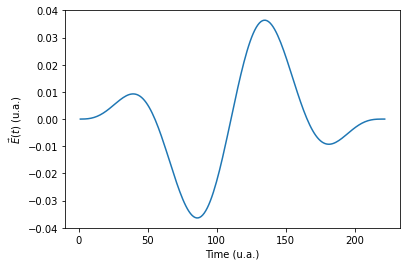

In [11]:
champ = np.genfromtxt("champ.dat")
plt.plot(champ[:,0],champ[:,1])
plt.xlabel("Time (u.a.)")
plt.ylabel(r"$\vec{E}(t)$ (u.a.)")

### Probabilité d'ionisation sur chaque canal P
Les graphiques suivant montrent la probabilité d'ionisation sur chaque canal. 

La forme est courbes est très semblable, ce que l'on observe pas dans la version PW.


In [12]:
n = 1
datab = []
while True:
    if n<10:
        debutfichier = "Proba_ionisation_canal0000"
    elif n<100:
        debutfichier = "Proba_ionisation_canal000"
    elif n<1000:
        debutfichier = "Proba_ionisation_canal00"
    elif n<10000:
        debutfichier = "Proba_ionisation_canal0"
    if exists(debutfichier+str(n)+".dat"):
        data = np.genfromtxt(debutfichier+str(n)+".dat")
        datab.append(data)
        plt.plot(data[:,1],data[:,2],label="n="+str(n))
        plt.legend()
        plt.show()
        #plt.close()
    else:
        print(str(n)+": le fichier "+debutfichier+str(n)+".dat n existe pas")
        break
    n=n+1




1: le fichier Proba_ionisation_canal00001.dat n existe pas


### Tout sur un seul graphique

In [13]:
n = 1
datab = []
while True:
    if n<10:
        debutfichier = "Proba_ionisation_canal0000"
    elif n<100:
        debutfichier = "Proba_ionisation_canal000"
    elif n<1000:
        debutfichier = "Proba_ionisation_canal00"
    elif n<10000:
        debutfichier = "Proba_ionisation_canal0"
    if exists(debutfichier+str(n)+".dat"):
        data = np.genfromtxt(debutfichier+str(n)+".dat")
        datab.append(data)
        plt.plot(data[:,1],data[:,2],label="n="+str(n))
        plt.legend()
        #plt.show()
        #plt.close()
    else:
        print(str(n)+": le fichier "+debutfichier+str(n)+".dat n existe pas")
        break
    n=n+1
plt.show()




1: le fichier Proba_ionisation_canal00001.dat n existe pas


### Population des états liés

Dans ce calcul, il n'y a qu'un état lié. Le graphique suivant montre sa population en fonction du temps. 

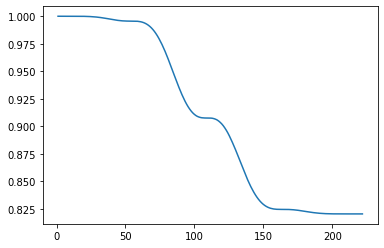

In [17]:
data = np.genfromtxt("CSF_Q.dat")
plt.plot(champ[:,0],data[:],label="Q=1")

### Spectre de photoélectrons

Tout les spectres sont semblable ...

In [6]:
dimP=11
ny=601
nz=601
#READ DATA
for i in range(dimP):
    ky=[]
    kz=[]
    p=[]
    fr=open('spectre_k_canal%05d.dat'%(i+1),'r')
    lr=fr.readlines()
    fr.close()
    it=0
    for j in range(ny):
        p_t=[]
        for k in range(nz):
            if(k==0):
                #ky.append(np.float64(lr[it][13:26]))
                ky.append(np.float64(lr[it][0:12]))
            if(j==0):
                kz.append(np.float64(lr[it][26:39]))
            if(lr[it][62]=='E'):
                p_t.append(np.float64(lr[it][39:66]))
            else:
                p_t.append(0.E0)
            it=it+1
        p.append(p_t)
    ky=np.array(ky)
    kz=np.array(kz)
    p=np.array(p)
    #MAKE LINEAR FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,p,levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel('kz (au)')
    plt.ylabel('ky (au)')
    plt.tight_layout()
    plt.savefig('spec_P%05d.png'%(i+1))
    plt.show()
    plt.close()
    #MAKE LOGARITHMIC FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,np.log10(p),levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Logarithmic photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel(r'$\log_{10}$(kz) (au)')
    plt.ylabel(r'$\log_{10}$(kx) (au)')
    plt.tight_layout()
    plt.savefig('spec_log_P%05d.png'%(i+1))
    plt.show()
    plt.close()
#print(p)
#print(ky)

IndexError: list index out of range

In [ ]:
#test MO
import os

class molecule():
    def __init__(self, atoms = [], totchg = 0., mocoeff = []):
        self.atoms = atoms
        self.totchg = totchg
        self.mocoeff = mocoeff

    def add_atoms(self,atome):
        self.atoms.append(atome)


class basis():
    def __init__(self, listecons, l, ao=[100]):
        self.listecons = listecons
        self.l = l
        self.ao = ao


class atom():
    def __init__(self,   bases = [], pos=[0.,0.,0.], chg=1.0, atype='H'):
        self.atype = atype
        self.chg = chg
        self.pos = pos
        self.bases = bases

    def add_basis(self,basis):
        self.bases.append(basis)
REP = "BASIS/CO2/1/"
xmax=6
zmax=6

x=np.arange(-xmax,xmax,0.01)
z=np.arange(-zmax,zmax,0.01)

xv, zv = np.meshgrid(x, z, sparse=False, indexing='ij')

def get_orb(argosls, line):
    if "orbitals" in argosls[line]:
        orb = []
        TYPE = argosls[line].split()[0]
        print("Orbitals Type = ",TYPE)
        line = line + 3
        while not ("symmetry orbital" in argosls[line+1]):
            print(argosls[line])
            orb.append([float(argosls[line].split()[0]),float(argosls[line].split()[1])])
            line = line + 1
            #print("Line + 2 = ",argosls[line+2])
        else: 
            line = line + 2
            if 's' in TYPE:
                line = line + 4
                print("test line ", argosls[line])
                ao = [argosls[line].split()[1]]
                l = 0
            if 'p' in TYPE:
                line = line + 6
                ao = [argosls[line].split()[1],argosls[line+1].split()[1],argosls[line+2].split()[1]]
                line = line + 2
                l = 1
            line = line + 2
            return line, orb, TYPE, ao, l
        
f = open(REP+'argosls.sp', "r")
argosls = f.readlines()
f.close()
# title = argosls[2]
#print(str(mocoeff[1]))
#print("!!!!!!!!!!!!! TTTTESSSSSSSSSSSSTTTTTTT")
#print(argosls[3].split())
line=3
NGEN, NS, NAORDS, NCONS, NGCS, ITOL, ICUT, AOINTS, ONLY1E, \
 INRM, NCRS, L1REC, L2REC, AOINT2, FSPLIT = argosls[line].split()

NAORDS = int(NAORDS)

fname=REP+'mocoef_scf.sp'
with open(fname) as f:
    content = f.readlines()
content = [x.strip() for x in content]
nmocoeffs = int(content[6].split()[0])

print(nmocoeffs)
mocoeff = np.zeros((nmocoeffs, nmocoeffs))
norb=0
morb=0
ncont=10
while morb < nmocoeffs:
#while morb<27:
    while norb < nmocoeffs:
        for number in content[ncont].split():
            print(morb,norb,number)
            mocoeff[morb][norb] = number
            norb = norb + 1
        ncont = ncont + 1
    morb=morb+1
    norb=0

f.close()
while not ("nuclear repulsion energy" in argosls[line]):
    line = line + 1

#while not ("atoms" in argosls[line]):
#    line = line + 1


mol = molecule()
atome = atom()

def searchorb(atome,argosls,line,mol):
    if "orbitals" in argosls[line]:
        line,orb,TYPE,ao, l = get_orb(argosls, line)
        atome.add_basis(basis(listecons=orb, l=l, ao=ao))
        print(orb)
        print("line = ", line)
        print(argosls[line])
        if "orbitals" in argosls[line]:
            searchorb(atome,argosls,line,mol)
        else :
            mol.add_atoms(atome)
            searchatomorb(argosls,line,atome,mol)

def searchatomorb(argosls,line,atome,mol):
    while line < len(argosls)-1 and (("orbitals" in argosls[line]) or not ("atoms" in argosls[line])):
        line = line + 1
    else : 
        if ("atoms" in argosls[line]):
            
            ATYPE = argosls[line].split()[0]
            line = line + 2
            CHG = argosls[line].split()[2]
            line = line + 3

            ATOMNUM = argosls[line].split()[0]
            X = float(argosls[line].split()[1]) 
            Y = float(argosls[line].split()[2]) 
            Z = float(argosls[line].split()[3]) 
            print(ATYPE)
            print(CHG)
            print(ATOMNUM)
            print(X,Y,Z)
            
            atome = atom(atype=ATYPE, pos = [X,Y,Z], chg = CHG, bases=[])
            print("test new basis", atome.bases )
            line = line + 2
            searchorb(atome,argosls,line,mol)
            
            print("testing atom add in molecule")
            for atome in mol.atoms:
                print(atome.atype)
        else:
            #mol.add_atoms(atome)
            print("What else???")
            exit 
       
         

searchatomorb(argosls,line,atome,mol)
aoorbs = []
print("Testing Molecule")
m = 0
p = 0
for n in range(len(mol.atoms)):
    atome = mol.atoms[n]
    print(atome.atype)
    print(atome.pos)
    for base in atome.bases:

        print(base.listecons)
        if base.l == 0:
            orb = np.zeros(xv.shape)
            for con in base.listecons:
                orb = orb + con[1] * np.exp(-con[0] * ((xv-atome.pos[0]) ** 2.0 + (zv-atome.pos[2]) ** 2.0))
            aoorbs.append(orb)

            plt.contourf(xv, zv, orb)
            plt.colorbar()
            plt.savefig('aoorb_' + str(m) + '.png')
            plt.close()
            m = m + 1
        if base.l == 1:
            for iao in base.ao:
                if iao == "100":
                    mult = xv
                elif iao == "010":
                    mult = 0
                elif iao == "001":
                    mult = zv
                orb = np.zeros(xv.shape)
                for con in base.listecons:
                    orb = orb + con[1] * np.exp(-con[0] * ((xv - atome.pos[0]) ** 2.0 + (zv - atome.pos[2]) ** 2.0))
                orb = orb * mult
                plt.contourf(xv, zv, orb)
                plt.colorbar()
                plt.savefig('aoorb_' + str(m) + '.png')
                plt.close()
                aoorbs.append(orb)
                m = m + 1

        #print('Min, Max')
        #print(min(orb))
        #print(max(orb))

moorb = []
#print("printing moceoeoof")
m = 0
for mocoefs in mocoeff:
    orb = np.zeros(xv.shape)
    print("MOCEOF (",m+1,") = ",mocoefs)
    #print("Sum**2 = ",np.sum(mocoefs)**2)
    norm = 0
    for mocoef in mocoefs:
        orb = orb + float(mocoef)*aoorbs[m]
        norm = norm + mocoef**2
    #print("norm =" , norm)
    plt.contourf(xv, zv, orb)
    plt.colorbar()
    plt.show()
    plt.savefig('moorb_' + str(m) + '.png')
    plt.close()
    m = m + 1
    #for mocoef in mocoeff:


#        print(atome.atype)
#        print(atome.pos)
#        n = 0
#        for base in atome.basis:
#            print(base.listecons)#
#
#            for con in base.listecons:
#                if base.l == 0:
#                    orb = orb + con[1] * np.exp(-con[0] * ((xv-atome.pos[0]) ** 2.0 + (zv-atome.pos[2]) ** 2.0))
#
#            plt.contourf(xv, zv, orb)
#            plt.savefig('orb_'+str(n)+'.png')
#        n = n + 1

In [19]:

def tick_function(X):
        V = X*0.0241888425
        return ["%.0f" % z for z in V]

def au2fs(X):
        V = X*0.0241888425
        return V

def fs2au(X):
        V = X/0.0241888425
        return V
xlabeltime="Time (u.a.)"
ylabelchamp="Intensity (u.a.)"
ylabelpop="Population"
xlabelspectre="k"
ylabelspectre="Intensity"

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


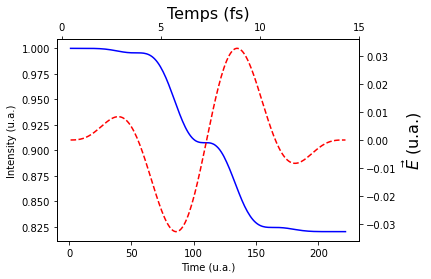

In [20]:

pop1=np.genfromtxt('CSF_Q.dat')
ax1=plt.subplot(1, 1, 1)
plt.plot(champ[:,0],pop1[:],"b-")
plt.xlabel(xlabeltime)
plt.ylabel(ylabelpop)


ax2 = ax1.twinx()
ax2.plot(champ[:,0],champ[:,2],"r--")
ax2.set_ylabel(r'$\vec{E}$ (u.a.)',fontsize=16)
ax1R = ax1.twiny()
arrayenfs=np.arange(0,20,5)
print(arrayenfs)
arrayenua=fs2au(arrayenfs)
print(arrayenua)
new_tick_locations=arrayenfs
new_tick_locations=np.array([200])
ax1R.set_xlim(ax1.get_xlim())
ax1R.set_xticks(arrayenua)
ax1R.set_xticklabels(tick_function(arrayenua))
ax1R.set_xlabel(r"Temps (fs)",fontsize=16)
ax1.set_ylabel(ylabelchamp)
plt.gcf().subplots_adjust(top=0.85,bottom=0.15,left=0.1,right=0.8)

plt.savefig('HCN_CSFQ.png')


plt.show()
plt.close()

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


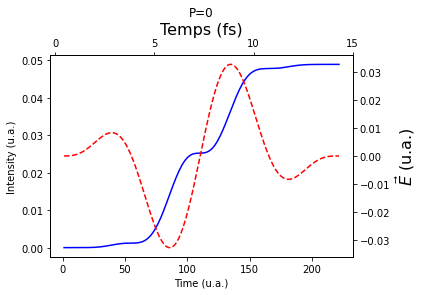

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


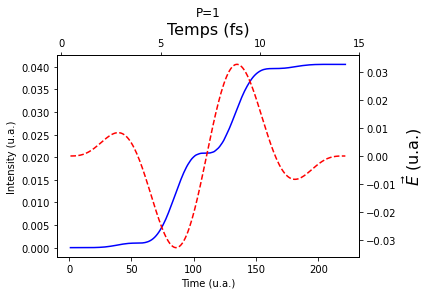

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


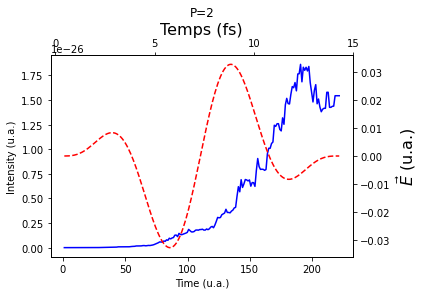

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


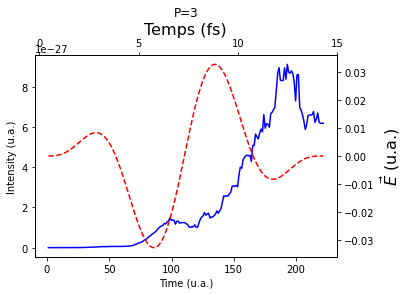

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


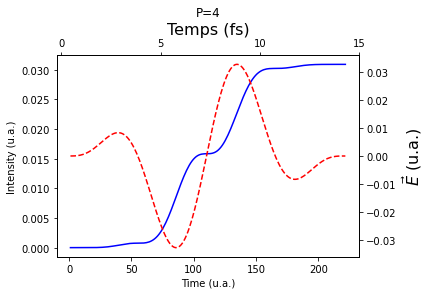

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


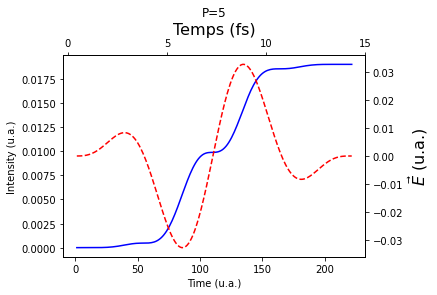

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


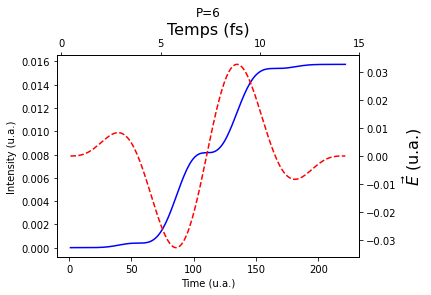

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


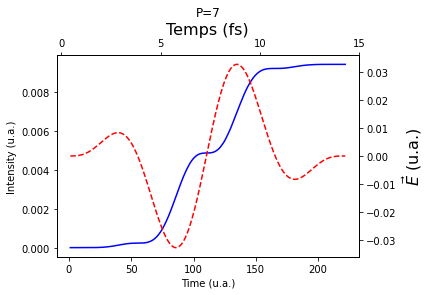

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


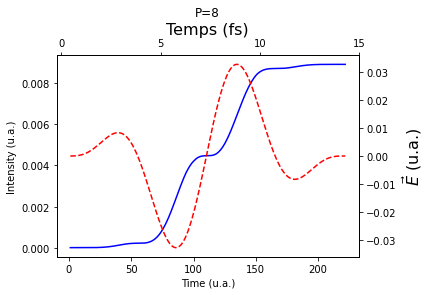

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


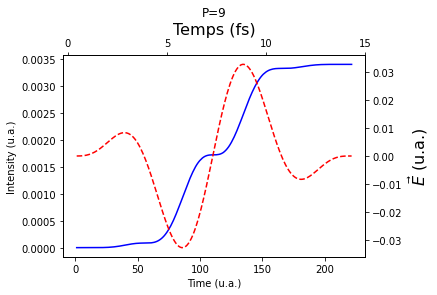

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


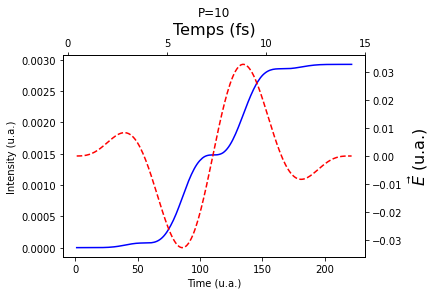

test


In [21]:
pop1=np.genfromtxt('CSF_P.dat')

for n in range(11):
    ax1=plt.subplot(1, 1, 1)
    plt.plot(champ[:,0],pop1[:,n],"b-", label="Pop P="+str(n))
    plt.xlabel(xlabeltime)
    plt.ylabel(ylabelpop)
    plt.title("P="+str(n))

    ax2 = ax1.twinx()
    ax2.plot(champ[:,0],champ[:,2],"r--")
    ax2.set_ylabel(r'$\vec{E}$ (u.a.)',fontsize=16)
    ax1R = ax1.twiny()
    arrayenfs=np.arange(0,20,5)
    print(arrayenfs)
    arrayenua=fs2au(arrayenfs)
    print(arrayenua)
    new_tick_locations=arrayenfs
    new_tick_locations=np.array([200])
    ax1R.set_xlim(ax1.get_xlim())
    ax1R.set_xticks(arrayenua)
    ax1R.set_xticklabels(tick_function(arrayenua))
    ax1R.set_xlabel(r"Temps (fs)",fontsize=16)
    ax1.set_ylabel(ylabelchamp)
    plt.gcf().subplots_adjust(top=0.85,bottom=0.15,left=0.1,right=0.8)

    plt.savefig('HCN_CSFP+str(n).png')


    plt.show()
    plt.close()
print("test")

[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]
[ 0  5 10 15]
[  0.         206.70687322 413.41374644 620.12061966]


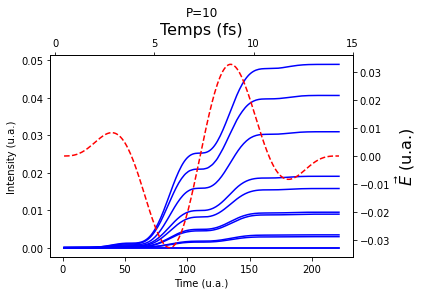

test


In [23]:
pop1=np.genfromtxt('CSF_P.dat')

for n in range(11):
    ax1=plt.subplot(1, 1, 1)
    plt.plot(champ[:,0],pop1[:,n],"b-", label="Pop P="+str(n))
    plt.xlabel(xlabeltime)
    plt.ylabel(ylabelpop)
    plt.title("P="+str(n))

    ax2 = ax1.twinx()
    ax2.plot(champ[:,0],champ[:,2],"r--")
    ax2.set_ylabel(r'$\vec{E}$ (u.a.)',fontsize=16)
    ax1R = ax1.twiny()
    arrayenfs=np.arange(0,20,5)
    print(arrayenfs)
    arrayenua=fs2au(arrayenfs)
    print(arrayenua)
    new_tick_locations=arrayenfs
    new_tick_locations=np.array([200])
    ax1R.set_xlim(ax1.get_xlim())
    ax1R.set_xticks(arrayenua)
    ax1R.set_xticklabels(tick_function(arrayenua))
    ax1R.set_xlabel(r"Temps (fs)",fontsize=16)
    ax1.set_ylabel(ylabelchamp)
    plt.gcf().subplots_adjust(top=0.85,bottom=0.15,left=0.1,right=0.8)

    plt.savefig('HCN_CSFP+str(n).png')


plt.show()
plt.close()
print("test")

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


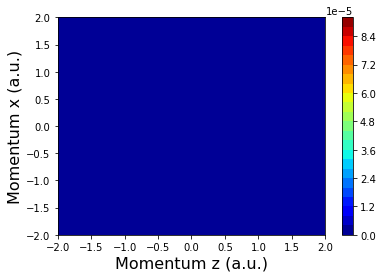

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


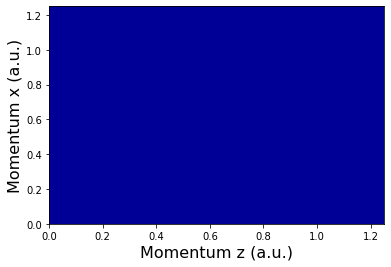

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


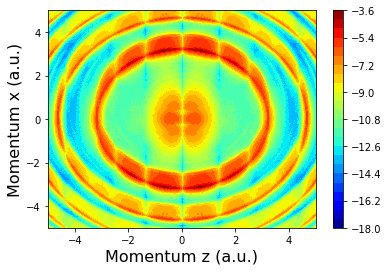

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


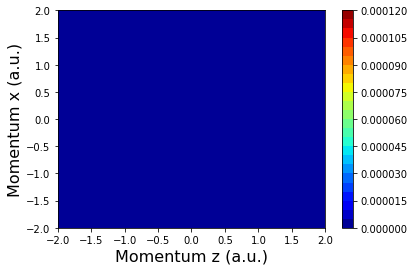

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


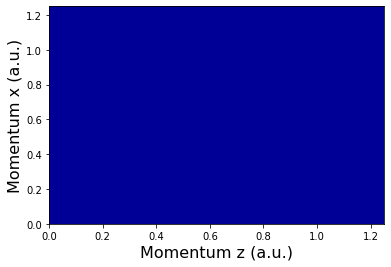

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


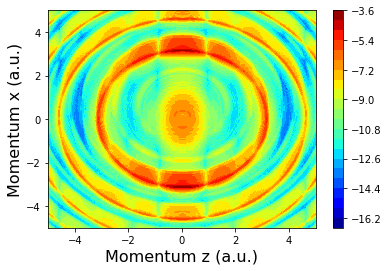

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


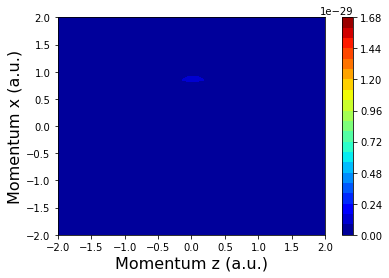

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


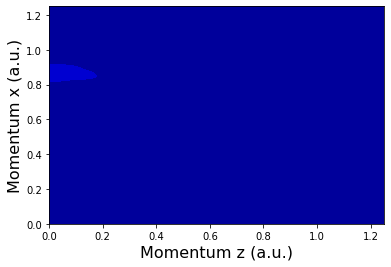

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


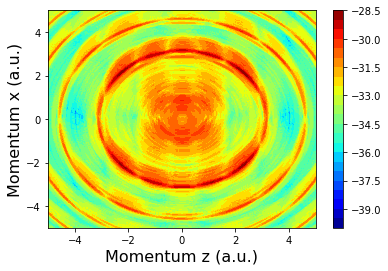

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


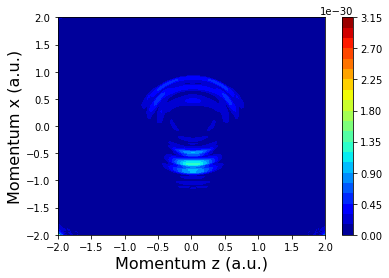

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


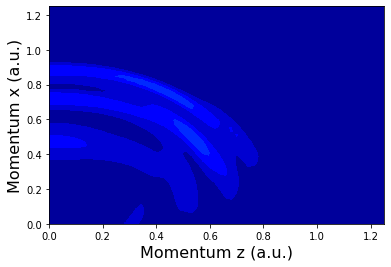

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


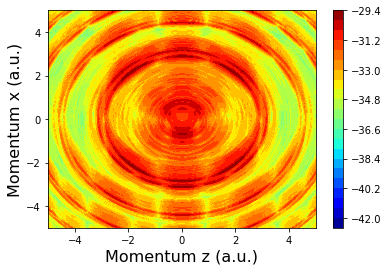

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


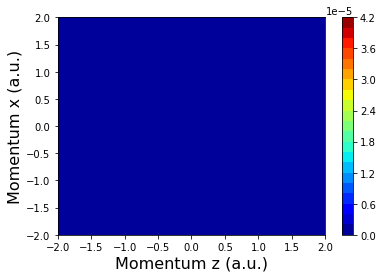

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


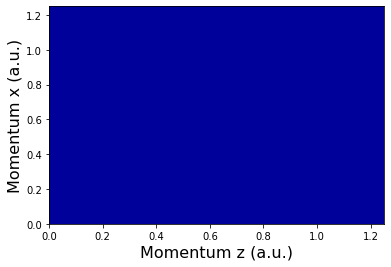

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


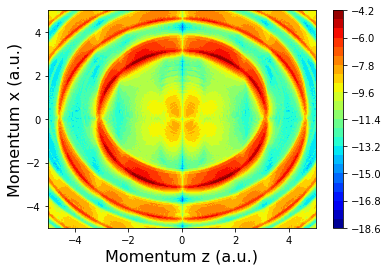

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


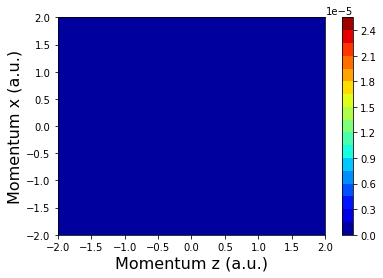

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


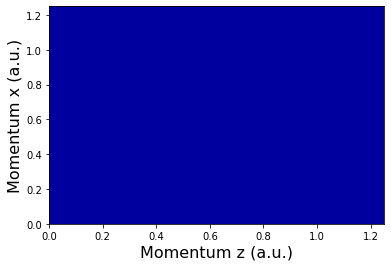

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


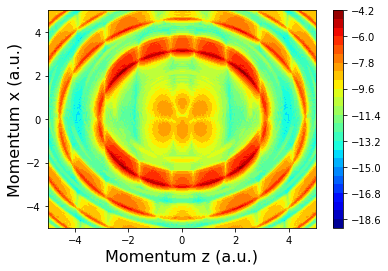

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


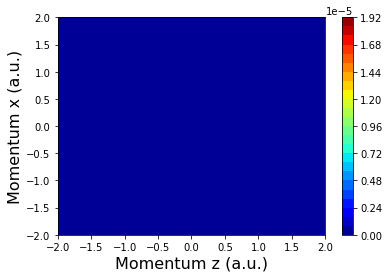

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


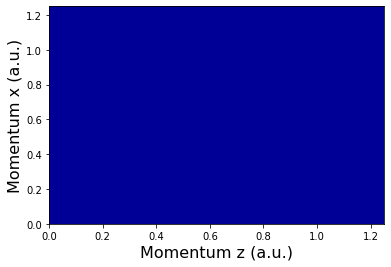

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


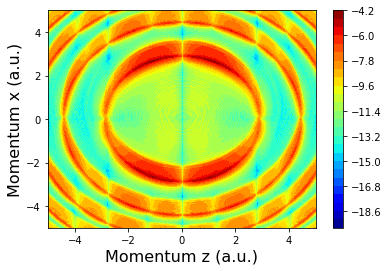

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


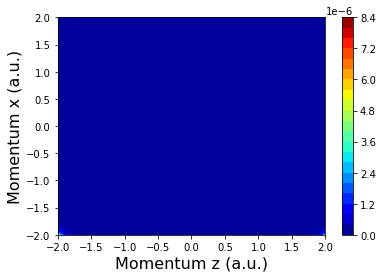

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


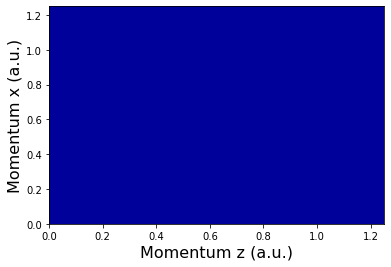

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


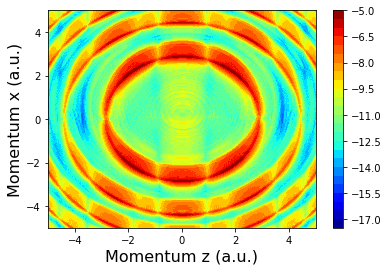

<ipython-input-22-f3c3234ef7f5>:11: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4a.canvas.set_window_title('spectre canal '+str(can))


dx= 0.020909102519730105
dy= 0.0


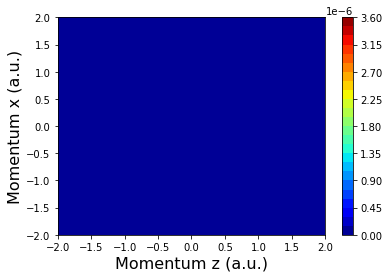

<ipython-input-22-f3c3234ef7f5>:47: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4a.colorbar(cf)


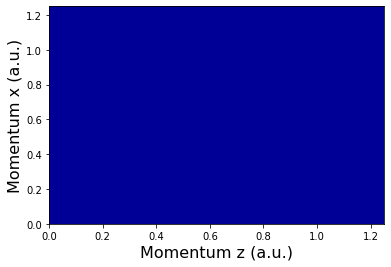

<ipython-input-22-f3c3234ef7f5>:56: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')


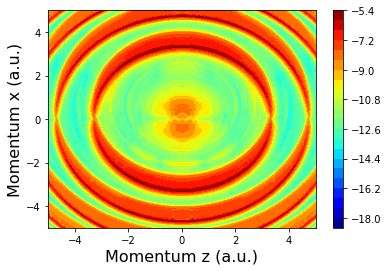

finish


In [22]:
import os
nbins=25
can=1
while(os.path.isfile('spectre2dXZ_canal0000'+str(can)+'.dat')):
  if(can<10):
    canal1_2d=np.loadtxt('spectre2dXZ_canal0000'+str(can)+'.dat')
  else:
    canal1_2d=np.loadtxt('spectre2dXZ_canal000'+str(can)+'.dat')
  canal1_2d=canal1_2d.transpose()
  fig4a = plt.figure()
  fig4a.canvas.set_window_title('spectre canal '+str(can))
  X=np.loadtxt('kx.dat')
  X=X.transpose()
  dx=X[0,1]-X[0,0]
  dx=X[1,0]-X[0,0]
  print("dx=",dx)
  Y=np.loadtxt('kzx.dat')
  Y=Y.transpose()
  dy=Y[1,0]-Y[0,0]
  print("dy=",dy)
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(canal1_2d.min(), canal1_2d.max())
  cf=plt.contourf(Y,X ,canal1_2d,levels=leveltot,cmap='jet')

  xmin=-2
  xmax=2.0
  zmin=-2
  zmax=2
  plt.axis([xmin, xmax, zmin, zmax])
  fig4a.colorbar(cf)
  FILESPECTRE2Dcanal1='HCN_spectre2dcanal'+str(can)+'.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1)
  plt.show()
  plt.close()
  
  # ZOOM
  xmin=0
  xmax=1.25
  zmin=0
  zmax=1.25
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(canal1_2d.min(), canal1_2d.max())
  cf=plt.contourf(Y,X ,canal1_2d,levels=leveltot,cmap='jet')


  plt.axis([xmin, xmax, zmin, zmax])
  fig4a.colorbar(cf)
  FILESPECTRE2Dcanal1='HCN_spectre2dcanal_zoom'+str(can)+'.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1)
  plt.show()
  plt.close()   
    
  fig4b = plt.figure()
  fig4b.canvas.set_window_title('spectre canal '+str(can)+' LOG')
  Z=np.log10(canal1_2d)
  #-18 a -25
  leveltot = plt.MaxNLocator(nbins=nbins).tick_values(Z.min(), Z.max())
  cfb=plt.contourf(Y,X ,Z,levels=leveltot,cmap='jet')
  LOGYMAX=5
  LOGZMAX=5
  plt.axis([-LOGYMAX, LOGYMAX, -LOGZMAX, LOGZMAX])
  fig4b.colorbar(cfb)
  FILESPECTRE2Dcanal1LOG='HCN_spectre2dcanal'+str(can)+'LOG.pdf'
  plt.ylabel('Momentum x (a.u.)',fontsize=16)
  plt.xlabel('Momentum z (a.u.)',fontsize=16)
  plt.savefig(FILESPECTRE2Dcanal1LOG)
  plt.show()
  plt.close()

  can=can+1
    
print('finish')
